In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

from scipy.optimize import curve_fit

In [2]:
os.path.dirname(os.path.abspath())

TypeError: abspath() missing 1 required positional argument: 'path'

[4.21456817e-06 5.81624618e-04]
[0.01967005 0.00429446]


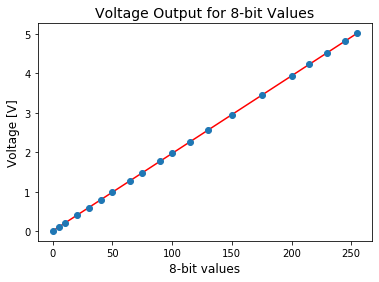

In [3]:
bits= np.array([0,5,10,20,30,40,50,65,75,90,100,115,130,150,175,200,215,230,245,255])
volts = np.array([0.004,0.102,0.200,0.397,0.594,0.791,0.988,1.283,1.480,1.775,1.972,2.267,2.562,2.955,3.45,3.94,4.23,4.53,4.82,5.02])
fit = np.polyfit(bits,volts,1)

voltserr = [0.001]*20

def residualNumbers(x,y):
    residualValues = x-y
    return residualValues


def slope(x,y):
    a = (y[-1] - y[0])/(x[-1] - x[0])
    
    return a

def func(x,a,b):
    return a*x + b

y = func(bits,slope(bits,volts),0.004)

popt, pcov = curve_fit(func, bits, volts)


plt.figure()
plt.plot(bits, func(bits, *popt), 'r-')
plt.plot(bits,volts,'o')

plt.title('Voltage Output for 8-bit Values', fontsize = 14)
plt.xlabel('8-bit values',fontsize = 12)
plt.ylabel('Voltage [V]', fontsize = 12)

perr = np.sqrt(np.diag(pcov))

#Print the slope, intercept and their error
print(perr)
print(popt)
plt.show()



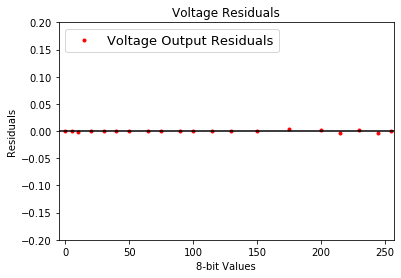

In [22]:
#Plot the residuals

plt.plot(bits,residualNumbers(volts,func(bits, *popt)), 'r.', label = "Voltage Output Residuals")
plt.axhline(0,color = 'k', linestyle = '-')
plt.title('Voltage Residuals')
plt.axis([-5,257,-0.2,0.2])
plt.xlabel('8-bit Values')
plt.ylabel('Residuals')
plt.legend(loc=2, prop={'size': 13})
plt.show()